In [1]:
import torch
import vision_models as models
from vision_models.visualizations import show_conv1

models

<module 'vision_models' from '/home/jovyan/work/GitHub/visionlab_models/vision_models/__init__.py'>

In [2]:
models.list_families()

['alexnet_pytorch', 'stylized_imagenet']

In [3]:
models.list_models('stylized_imagenet')

['alexnet_SIN',
 'alexnet_IN',
 'vgg16_SIN',
 'vgg16_IN',
 'resnet50_SIN',
 'resnet50_IN',
 'resnet50_SIN_and_IN',
 'resnet50_SIN_and_IN_finetuned_on_IN']

In [20]:
model_name = 'resnet50_IN'
models.show_metadata('stylized_imagenet', model_name)

{'num_classes': 1000,
 'input_size': (3, 224, 224),
 'crop_pct': 0.875,
 'resize': 256,
 'input_range': [0, 1],
 'mean': [0.485, 0.456, 0.406],
 'std': [0.229, 0.224, 0.225],
 'interpolation': <InterpolationMode.BILINEAR: 'bilinear'>,
 'repo': 'https://github.com/rgeirhos/texture-vs-shape',
 'task': 'supervised1k',
 'dataset': 'imagenet1k',
 'datasize': '1.3M',
 'bib': '"\\"\\""',
 'arch': 'resnet50_pytorch',
 'hashid': '0676ba61',
 'weights_url': 'https://download.pytorch.org/models/resnet50-0676ba61.pth',
 'description': 'Resnet50(PyTorch) Trained on Standard IN1K Classification',
 'model_family': 'stylized_imagenet',
 'model_name': 'resnet50_IN'}

In [21]:
# model, transforms = models.load_model('stylized_imagenet', 'alexnet_SIN')
# model, transforms = models.load_model('stylized_imagenet', 'vgg16_SIN')
model, transforms = models.load_model('stylized_imagenet', model_name)
model

==> resnet50_IN_0676ba61
==> loading checkpoint: https://download.pytorch.org/models/resnet50-0676ba61.pth
==> state loaded: <All keys matched successfully>
==> cache_filename: stylized_imagenet_resnet50-0676ba61.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [22]:
print(transforms)
transform = transforms['test_transforms']
inv_transform = transforms['to_pil']
transform

{'val_transforms': Compose(
    OpenImage()
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
), 'test_transforms': Compose(
    OpenImage()
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
), 'to_pil': Compose(
    InverseNormalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
    ToPILImage()
)}


Compose(
    OpenImage()
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

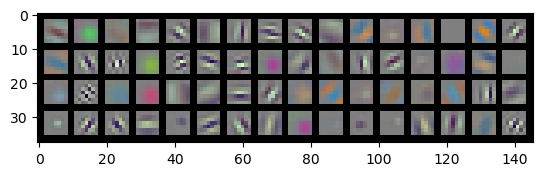

In [23]:
show_conv1(model)

In [24]:
url = 'https://www.dropbox.com/s/n8nr36vox86t25u/example.png?dl=1'
img = transform(url)
img.shape

torch.Size([3, 224, 224])

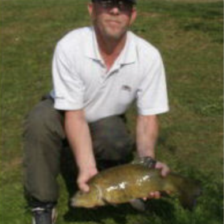

In [25]:
inv_transform(img)

In [26]:
layer_names = model.relu_layers + ['classifier.6' if 'classifier.6' in model.layer_names else 'fc']
layer_names

['relu',
 'layer1.0.relu',
 'layer1.1.relu',
 'layer1.2.relu',
 'layer2.0.relu',
 'layer2.1.relu',
 'layer2.2.relu',
 'layer2.3.relu',
 'layer3.0.relu',
 'layer3.1.relu',
 'layer3.2.relu',
 'layer3.3.relu',
 'layer3.4.relu',
 'layer3.5.relu',
 'layer4.0.relu',
 'layer4.1.relu',
 'layer4.2.relu',
 'fc']

In [27]:
model.eval()
with torch.no_grad():
    batch = img.unsqueeze(0)
    feat = model.get_features(batch, layer_names=layer_names)
for k,v in feat.items(): print(k, v.shape)

relu torch.Size([1, 64, 112, 112])
layer1.0.relu torch.Size([1, 256, 56, 56])
layer1.1.relu torch.Size([1, 256, 56, 56])
layer1.2.relu torch.Size([1, 256, 56, 56])
layer2.0.relu torch.Size([1, 512, 28, 28])
layer2.1.relu torch.Size([1, 512, 28, 28])
layer2.2.relu torch.Size([1, 512, 28, 28])
layer2.3.relu torch.Size([1, 512, 28, 28])
layer3.0.relu torch.Size([1, 1024, 14, 14])
layer3.1.relu torch.Size([1, 1024, 14, 14])
layer3.2.relu torch.Size([1, 1024, 14, 14])
layer3.3.relu torch.Size([1, 1024, 14, 14])
layer3.4.relu torch.Size([1, 1024, 14, 14])
layer3.5.relu torch.Size([1, 1024, 14, 14])
layer4.0.relu torch.Size([1, 2048, 7, 7])
layer4.1.relu torch.Size([1, 2048, 7, 7])
layer4.2.relu torch.Size([1, 2048, 7, 7])
fc torch.Size([1, 1000])
